<a href="https://colab.research.google.com/github/liupengzhouyi/LearningPytorch/blob/master/20200327/LinearRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regresion

## function

$ y = x_1 * w_1 + x_2 * w_2 + b$

## Example

In [0]:
# !pip install mxnet

In [0]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random
import numpy 
import torch

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Create data

* $ x_1 $ = [x1, x2, x3, ...]

* $ x_2 $ = [x1, x2, x3, ...]

* $ y  $ = [x1, x2, x3, ...]

In [0]:
wieght = [1.50, 2.00, 3.00]
bias = 6.32
features = nd.random.normal(scale=1, shape=(100, 3))
labels = wieght[0] * features[:, 0] + wieght[1] * features[:, 1] + wieght[2] * features[:, 2] + bias
labels = labels + nd.random.normal(scale=0.001, shape=labels.shape)

## Show data as image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


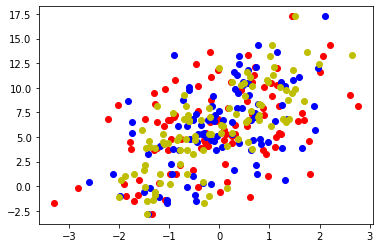

In [8]:
plt.scatter(features[:, 0].asnumpy(), labels.asnumpy(), color='R')
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), color='B')
plt.scatter(features[:, 2].asnumpy(), labels.asnumpy(), color='Y')
plt.show()

## Read data

In [0]:
def data_iter(batch_size, features, labels):
    longth = len(features)
    indices = list(range(longth))
    random.shuffle(indices)
    for i in range(0, longth, batch_size):
        j = nd.array(indices[i:min(i+batch_size, longth)])
        yield features.take(j), labels.take(j)

In [10]:
batch_size = 10
for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
    print(X, y)
    break


[[ 1.0249989   0.5808451   0.486164  ]
 [-0.8764637  -0.08521592  0.79784435]
 [ 0.4279041  -0.6082104   1.33961   ]
 [ 0.09210896 -0.1585041  -0.47546953]
 [-1.015936    0.07959834  0.58136743]
 [ 0.2444218  -0.03716067 -0.48774993]
 [-1.2416507   1.6491317  -1.2902275 ]
 [-1.108803   -0.8273198   1.0406365 ]
 [-1.767485   -0.91792876  0.6508565 ]
 [-0.9098478  -0.14092611  0.7806437 ]]
<NDArray 10x3 @cpu(0)> 
[10.47792    7.2291756  9.764451   4.713549   6.700169   5.1496706
  3.884626   6.1233897  3.7865605  7.0140386]
<NDArray 10 @cpu(0)>


In [0]:
w = nd.random.normal(scale=0.01, shape=(3, 1))
b = nd.zeros(shape=(1, ))

In [0]:
w.attach_grad()
b.attach_grad()

In [0]:
def myModel(X, w, b):
    return nd.dot(X, w) + b

In [0]:
def myLoss(y, y_r):
    return (y_r - y.reshape(y_r.shape)) ** 2 / 2

In [0]:
def myOptimizer(paraemers, lr, batch_size):
    for paraemer in paraemers:
        paraemer[:] = paraemer - lr * paraemer.grad / batch_size

In [20]:
for epoch in range(1000):
    for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
        # X = X.to(device)
        # y = y.to(device)
        with autograd.record():
            l = myLoss(myModel(X, w, b), y)
        l.backward()
        myOptimizer([w, b], lr=0.003, batch_size=batch_size)
    train_l = myLoss(myModel(features, w, b), labels)
    print(epoch, train_l.mean().asnumpy())

0 [0.07841518]
1 [0.07403783]
2 [0.06990449]
3 [0.06600203]
4 [0.0623172]
5 [0.05883941]
6 [0.05555484]
7 [0.05245383]
8 [0.04952576]
9 [0.04676181]
10 [0.04415255]
11 [0.04168896]
12 [0.03936212]
13 [0.03716525]
14 [0.03509173]
15 [0.03313392]
16 [0.03128515]
17 [0.0295395]
18 [0.02789119]
19 [0.02633521]
20 [0.02486602]
21 [0.02347883]
22 [0.0221691]
23 [0.02093261]
24 [0.01976509]
25 [0.01866244]
26 [0.01762126]
27 [0.01663835]
28 [0.01570984]
29 [0.01483392]
30 [0.01400649]
31 [0.01322518]
32 [0.01248749]
33 [0.0117909]
34 [0.0111333]
35 [0.0105123]
36 [0.00992606]
37 [0.0093726]
38 [0.00884989]
39 [0.00835635]
40 [0.00789046]
41 [0.00745049]
42 [0.00703508]
43 [0.00664283]
44 [0.0062725]
45 [0.00592276]
46 [0.00559258]
47 [0.00528079]
48 [0.00498633]
49 [0.00470834]
50 [0.00444588]
51 [0.00419802]
52 [0.00396404]
53 [0.00374316]
54 [0.00353453]
55 [0.00333751]
56 [0.00315151]
57 [0.00297589]
58 [0.00281004]
59 [0.00265343]
60 [0.00250555]
61 [0.00236595]
62 [0.00223408]
63 [0.0021

In [21]:
print(w)
print(b)
# [1.50, 2.00, 3.00]
# bias = 6.32



[[1.4999906]
 [2.0000234]
 [3.000135 ]]
<NDArray 3x1 @cpu(0)>

[6.320018]
<NDArray 1 @cpu(0)>
